Comparing Contacts Binaries in PHOEBE 2 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed and manually install the python wrappers in the `phoebe-py` directory.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
b['q'] = 0.7

Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 76 parameters | contexts: dataset, compute, constraint, figure>

Now we add compute options for the 'legacy' backend.

In [4]:
b.add_compute('legacy')

<ParameterSet: 31 parameters | datasets: _default, rv01, lc01>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [5]:
b.set_value_all('atm', 'extern_planckint')

Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@secondary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at r

Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@secondary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and wi

Set value of gridsize for the trapezoidal (WD) mesh.

In [6]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [7]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@rv01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:05 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='legacy01'.  Change ld_mode@primary@rv01.  If not addressed, this warning will continue to be raised and will thr

Finally, let's compute our models

In [8]:
b.run_compute(kind='phoebe', model='phoebe2model', irrad_method='none')

100%|██████████| 101/101 [00:03<00:00, 30.61it/s]


<ParameterSet: 7 parameters | kinds: lc, rv>

In [9]:
b.run_compute(kind='legacy', model='phoebe1model', irrad_method='none')

Thu, 17 Sep 2020 18:05 IO           WARNING requiv_max@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING requiv_min@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING logg@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING freq@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING irrad_frac_lost_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING ld_mode_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING ld_func_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING ld_coeffs_source_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING mass@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING asini@primary@sta

Thu, 17 Sep 2020 18:05 IO           WARNING rv_method@secondary@rv01@legacy01@legacy@compute has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING fti_method@lc01@legacy01@legacy@compute has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING t0@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING ra@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING dec@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING distance@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING ebv@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING Av@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING Rv@system has no phoebe 1 corollary
Thu, 17 Sep 2020 18:05 IO           WARNING hierarchy@system has no phoebe 1 corollary
100%|██████████| 3/3 [00:00<00:00, 19.85it/s]


<ParameterSet: 7 parameters | kinds: lc, rv>

Plotting
-------------------------

### Light Curve

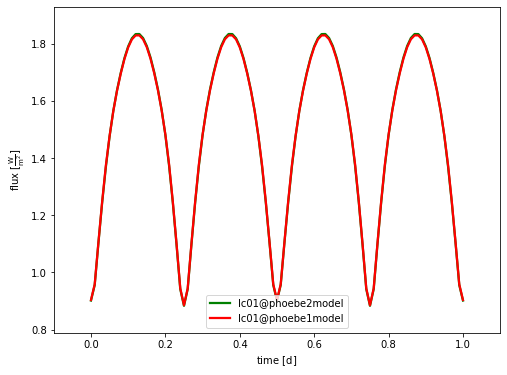

In [10]:
afig, mplfig = b.filter(dataset='lc01').plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                                             legend=True, show=True)

Now let's plot the residuals between these two models

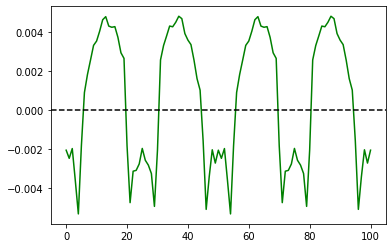

In [11]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

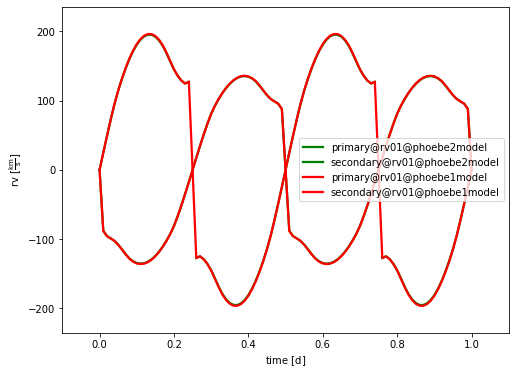

In [12]:
afig, mplfig = b['rv01'].plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                              legend=True, show=True)

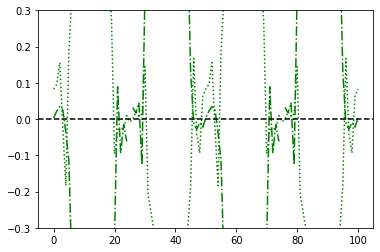

In [13]:
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)